In [20]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
plt.style.use('fivethirtyeight')


#read the data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
#data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

data_path = "/Users/abhishekkumar/Documents/MS_UB/Fall_18/ESL506_StatisticalDataMiningI/Project/SIGNATE/"
train = pd.read_table(os.path.join(data_path,"translated/'ttrain.tsv'.txt"),parse_dates=["datetime"], date_parser = dateparse)
test = pd.read_table(os.path.join(data_path,"translated/'ttest.tsv'.txt"),parse_dates=["datetime"], date_parser = dateparse)

In [21]:
nikko_train = pd.read_table(os.path.join(data_path,"ProcessedData/nikko_Dataset.csv"),parse_dates=["datetime"], date_parser = dateparse)
nikko_train.index = nikko_train["datetime"]
nikko_train = nikko_train.drop(["datetime", "epark","Unnamed: 0"], axis =1)

nikko_test = pd.read_table(os.path.join(data_path,"ProcessedData/Test/nikko_test_weather.csv"),parse_dates=["datetime"], date_parser = dateparse)
nikko_test.index = nikko_test["datetime"]

nikko_tvis = nikko_train["visitors"]
nikko_tvis.index = nikko_train.index

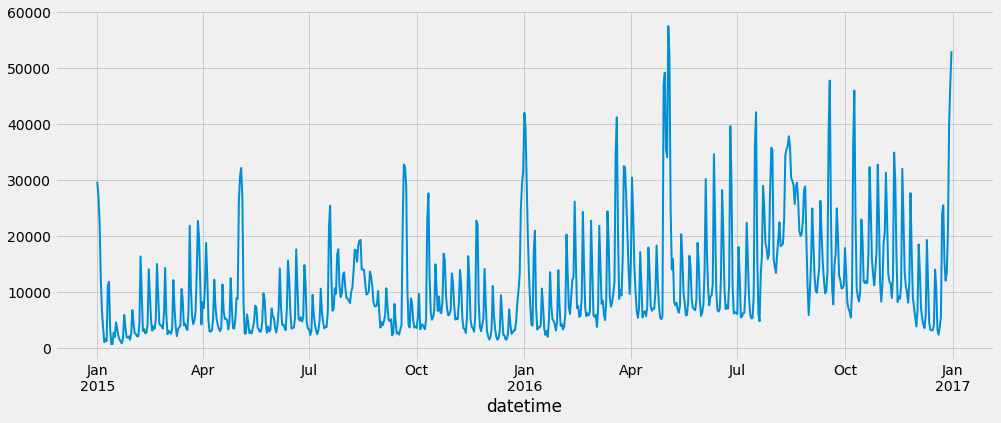

In [22]:
nikko_tvis.plot(figsize=(15, 6), linewidth = 2.0)

In [23]:
# Define the p, d and q parameters to take any value between 0 and 2
p = range(0, 2)
d = [1, 6, 7]
q = range(0, 4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
aic_dict = {}
aic = []
i=0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(nikko_tvis,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            aic.append(results.aic)
            aic_dict[results.aic] =  ('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            print(i)
            i=i+1
        except:
            continue


In [ ]:
min(aic)

In [ ]:
aic_dict[min(aic)]

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [ ]:
#Observed and forcasted
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))